In [1]:
# load libraries to process geographic data
import geopandas as gpd
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


In [2]:
df = pd.read_csv('../data/geodata01.csv')
df.head()

,LAT,LON,YEAR,DOY,T2M,T2MDEW,T2MWET,TS,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WS10M_RANGE,WD10M,WS50M,WS50M_RANGE,WD50M,T2M_RANGE
0,-35.25,16.75,2023,1,19.83,16.95,18.39,20.16,11.89,83.36,0.0,101.72,9.98,1.25,140.43,11.34,1.55,139.85,0.61
1,-35.25,17.25,2023,1,19.93,17.18,18.55,20.22,12.07,84.08,0.0,101.69,10.11,1.54,136.97,11.50,1.86,136.30,0.63
2,-35.25,17.75,2023,1,20.07,17.42,18.74,20.25,12.26,84.60,0.0,101.66,10.13,1.83,132.12,11.56,2.13,131.41,0.72
3,-35.25,18.25,2023,1,20.23,17.56,18.90,20.23,12.39,84.58,0.0,101.64,9.99,2.03,125.54,11.49,2.28,124.87,0.81
4,-35.25,18.75,2023,1,20.37,17.58,18.98,20.21,12.39,83.91,0.0,101.63,9.66,2.14,117.47,11.21,2.47,116.84,0.76


In [3]:
# list all variables on the dataset
pd.DataFrame(df.columns, columns=['Features'])

,Features
0,LAT
1,LON
2,YEAR
3,DOY
4,T2M
5,T2MDEW
6,T2MWET
7,TS
8,QV2M
9,RH2M


C:\Users\mfact\AppData\Local\Temp\ipykernel_3744\2644321440.py:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


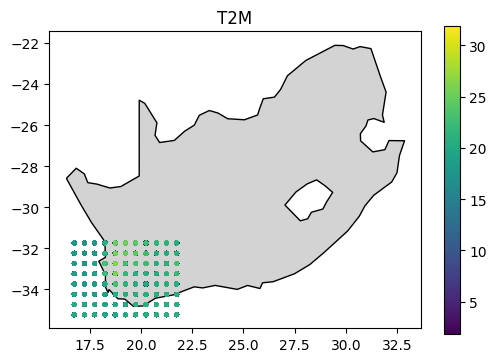

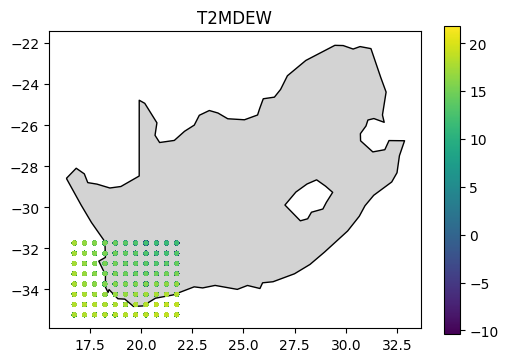

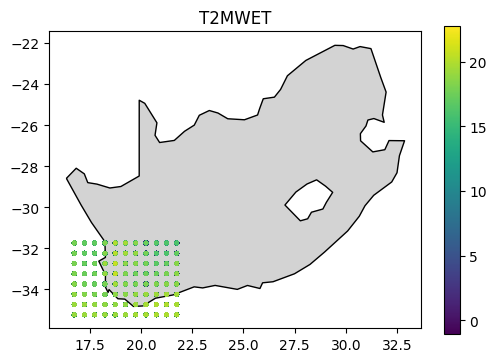

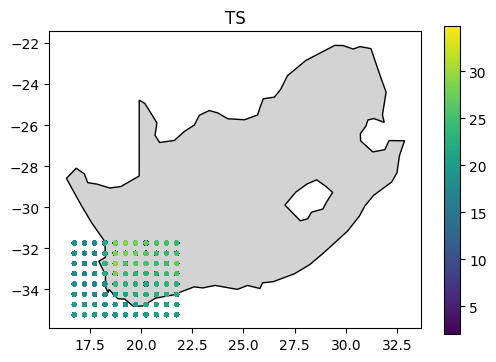

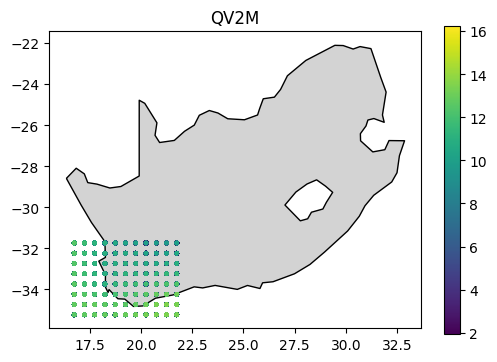

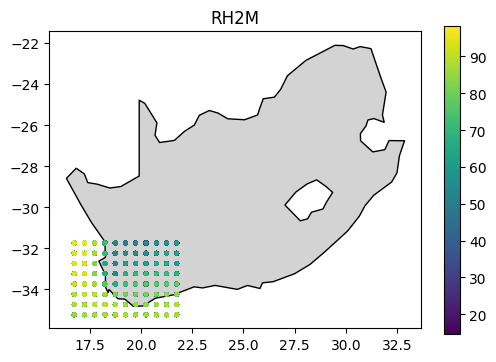

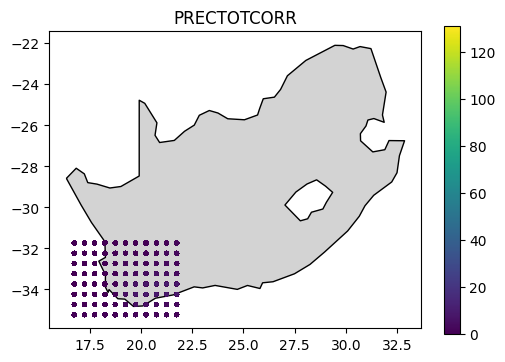

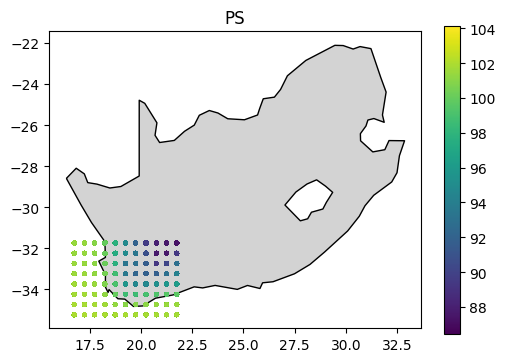

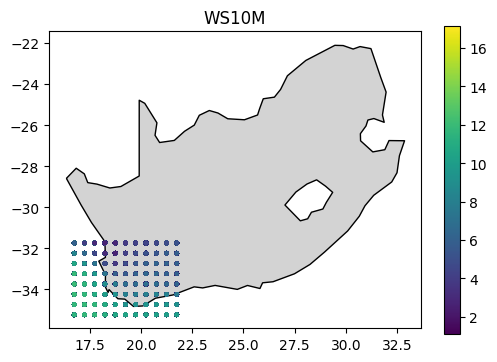

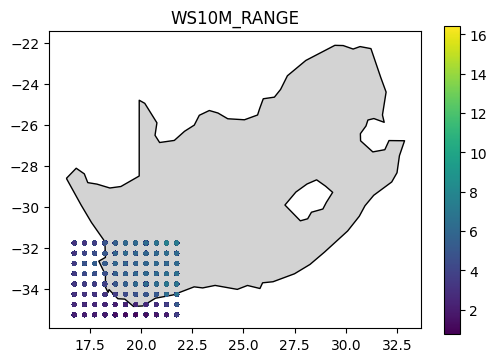

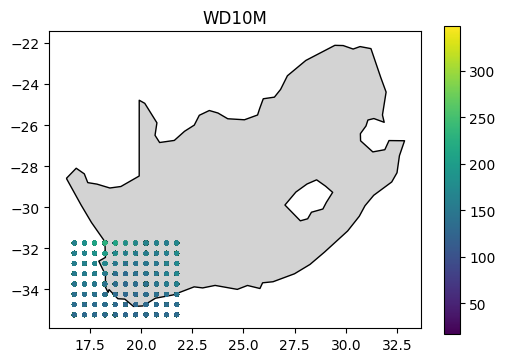

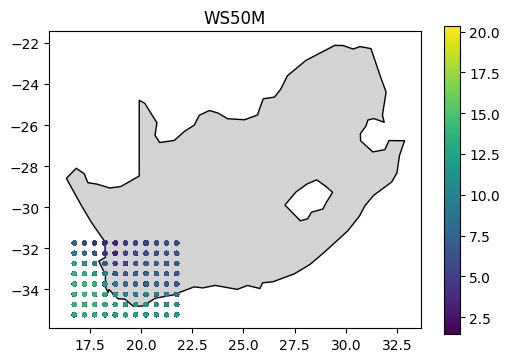

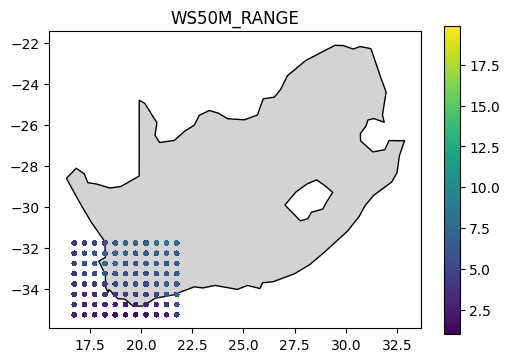

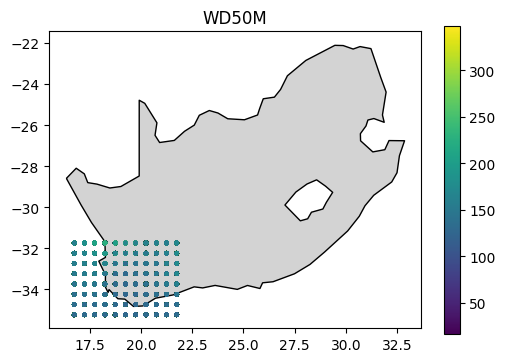

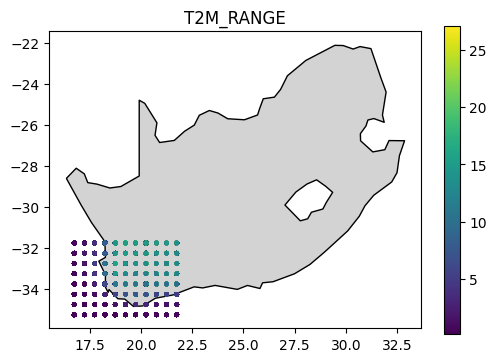

In [4]:
from shapely.geometry import Point

# Assuming df contains columns: 'LAT', 'LON', 'time', and variables to plot

# Convert DataFrame to GeoDataFrame
geometry = [Point(xy) for xy in zip(df['LON'], df['LAT'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Create a GeoDataFrame with the world boundaries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter to include only South Africa
south_africa = world[world['name'] == 'South Africa']

# Plot each variable on a map with smaller points, focusing on South Africa
variables = ['T2M', 'T2MDEW', 'T2MWET', 'TS', 'QV2M', 'RH2M', 'PRECTOTCORR', 'PS', 
             'WS10M', 'WS10M_RANGE', 'WD10M', 'WS50M', 'WS50M_RANGE', 'WD50M', 'T2M_RANGE']

for var in variables:
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))  # smaller figsize
    ax.set_title(var)
    
    # Plot South Africa boundaries
    south_africa.plot(ax=ax, color='lightgrey', edgecolor='black')
    
    # Plot the variable with smaller points
    gdf.plot(column=var, ax=ax, legend=True, markersize=5)  # smaller markersize
    plt.show()
